<a href="https://colab.research.google.com/github/ArtsemiRyabu/NN_ITP31_2/blob/lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image, ImageChops
import copy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.figure(figsize=(10,10))

def get_img(path):
  test_img = Image.open(path)
  test_img = test_img.resize((24, 24))
  plt.subplot(1,5,i)
  plt.imshow(test_img)
  test_x = np.array(test_img, np.float32)
  test_x = test_x / 255.0
  print(test_x.shape)
  return test_x

<Figure size 720x720 with 0 Axes>

(24, 24, 4)
(24, 24, 4)
(24, 24, 4)
(24, 24, 4)
(24, 24, 4)


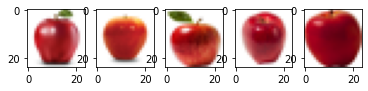

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

path = '/content/drive/MyDrive/Data/Train/Apples/'
for i in range(1, 6):
  x_train.append(get_img(path + str(i) +'.png'))
  y_train.append(0)

(24, 24, 4)
(24, 24, 4)
(24, 24, 4)


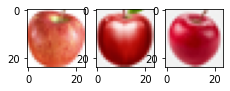

In [ ]:
path = '/content/drive/MyDrive/Data/Test/Apples/'
for i in range(1, 4):
  x_test.append(get_img(path + str(i) +'.png'))
  y_test.append(0)

(24, 24, 4)
(24, 24, 4)
(24, 24, 4)
(24, 24, 4)
(24, 24, 4)


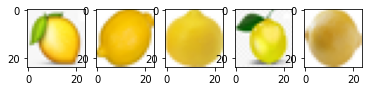

In [ ]:
path = '/content/drive/MyDrive/Data/Train/Lemons/'
for i in range(1, 6):
  x_train.append(get_img(path + str(i) +'.png'))
  y_train.append(1)

(24, 24, 4)
(24, 24, 4)
(24, 24, 4)


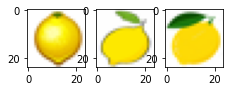

In [ ]:
path = '/content/drive/MyDrive/Data/Test/Lemons/'
for i in range(1, 4):
  x_test.append(get_img(path + str(i) +'.png'))
  y_test.append(1)

(24, 24, 4)
(24, 24, 4)
(24, 24, 4)
(24, 24, 4)
(24, 24, 4)


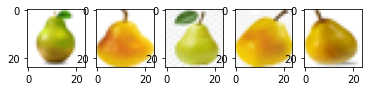

In [ ]:
path = '/content/drive/MyDrive/Data/Train/Pears/'
for i in range(1, 6):
  x_train.append(get_img(path + str(i) +'.png'))
  y_train.append(2)

(24, 24, 4)
(24, 24, 4)


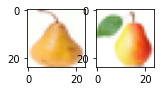

In [ ]:
path = '/content/drive/MyDrive/Data/Test/Pears/'
for i in range(1, 3):
  x_test.append(get_img(path + str(i) +'.png'))
  y_test.append(2)

In [ ]:
x_tr = []
x_tst = []

for i in range(len(x_train)):
  x = []
  for j in range(len(x_train[0])):
    for k in range(len(x_train[0][0])):
      x.extend(1 - x_train[i][j][k][:3])
  x_tr.append(x)
print(len(x_tr[0]))

for i in range(len(x_test)):
  x = []
  for j in range(len(x_test[0])):
    for k in range(len(x_test[0][0])):
      x.extend(1 - x_test[i][j][k][:3])
  x_tst.append(x)
print(len(x_tst[0]))

1728
1728


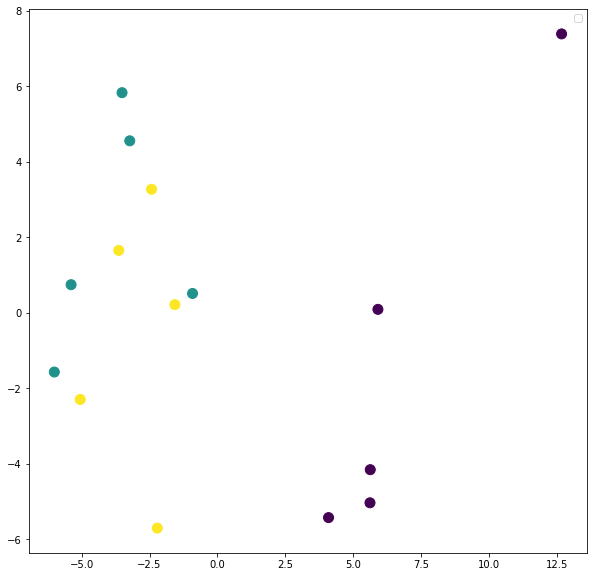

In [ ]:
plt.figure(figsize=(10,10))
pca = PCA(n_components=2)
pca_reduce = pca.fit_transform(x_tr)

pca_x1 = pca_reduce[:, 0]
pca_x2 = pca_reduce[:, 1]

plt.scatter(pca_x1, pca_x2, s = 100, c = y_train, alpha = 5)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 14 nearest neighbors...
[t-SNE] Indexed 15 samples in 0.000s...
[t-SNE] Computed neighbors for 15 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 15 / 15
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.554352
[t-SNE] KL divergence after 500 iterations: 0.353672


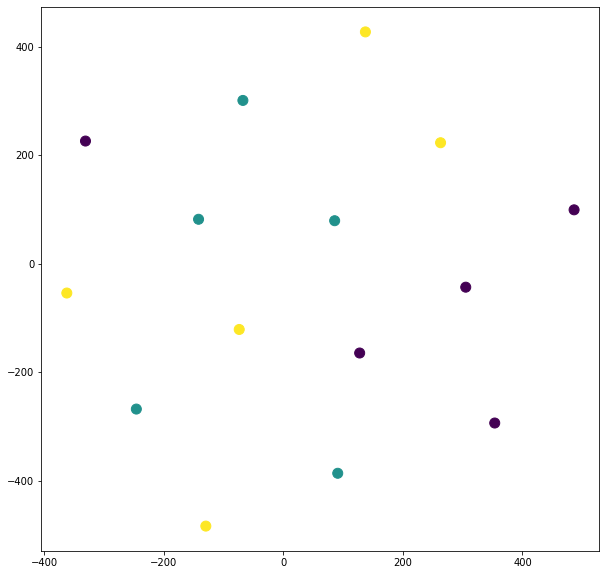

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter = 500)
tsne_res = tsne.fit_transform(x_tr)

tsne_x1 = tsne_res[:,0]
tsne_x2 = tsne_res[:,1]

plt.figure(figsize = (10,10))
plt.scatter(tsne_x1, tsne_x2, s = 100, c = y_train, alpha = 1)
plt.show()

In [ ]:
def y_to_arrays(y_t):
  y_arrays = []
  for y in y_t:
    y_arr = np.zeros(np.array(y_t).max() + 1, dtype = int)
    y_arr = y_arr.tolist()
    y_arr[y] = 1
    y_arrays.append(y_arr)
  return y_arrays

def arrays_to_y(y_arrays):
  y_t = []
  for y in y_arrays:
    y_t.append(np.argmax(y))
  return y_t

print(y_to_arrays(y_test))
print(arrays_to_y(y_to_arrays(y_test)))

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]]
[0, 0, 0, 1, 1, 1, 2, 2]


In [ ]:
def fun_sigmoid(s):
  return 1 / (1 + np.exp(-s))

def fun_der_sigm(s):
  return fun_sigmoid(s) * (1 - fun_sigmoid(s))

def err_acc(pred_y, tst_y, eps):
  hit = 0
  for i in range(len(tst_y)):
    if(np.abs(pred_y[i] - tst_y[i]) < eps): hit = hit + 1
  return hit / len(tst_y)

class Neuron:
  def __init__(self, weightsCount, number = None):
    if number is None: 
      self.weights = []
      for i in range(weightsCount):
        self.weights.append(random.randint(-3, 3))
    else:
      self.weights = [] 
      for i in range(weightsCount):
        self.weights.append(number)

  def get_sum(self, x):
    sum = 0
    for i in range(len(self.weights)):
      sum += self.weights[i] * x[i]
    return sum

  def feed(self, x):
    y = fun_sigmoid(self.get_sum(x))
    return y

  def print_params(self):
    n_str = ''
    for i in range(len(self.weights)):
      n_str += str(self.weights[i]) + " "
    print(n_str + str(self.bias))

In [ ]:
def err_los_mc(tst_y, pred_y):
  loss = 0
  for i in range(len(tst_y)):
    for j in range(len(tst_y[0])):
      loss += np.square(pred_y[i][j] - tst_y[i][j])
  loss = np.sqrt(loss) / len(tst_y)
  return loss

def add_bias_to_data(data):
  data_with_bias = copy.deepcopy(data)
  for elem in data_with_bias:
    elem.append(1)
  return data_with_bias

In [ ]:
class NetworkMC:
  def __init__(self, x_count, l1_count, l2_count, l3_count, y_count):
    self.NeuronsL1 = []
    self.NeuronsL2 = []
    self.NeuronsL3 = []
    self.out_layer = []
    for i in range(l1_count):
      n = Neuron(x_count + 1)
      self.NeuronsL1.append(n)
    for i in range(l2_count):
      n = Neuron(l1_count + 1)
      self.NeuronsL2.append(n)
    for i in range(l3_count):
      n = Neuron(l2_count + 1)
      self.NeuronsL3.append(n)
    for i in range(y_count):
      n = Neuron(l3_count + 1)
      self.out_layer.append(n)

  def predict(self, data):
    data_with_bias = add_bias_to_data(data)
    y_pred = []
    for x in data_with_bias:
      y = []
      res1 = []
      for n in self.NeuronsL1:
        res1.append(n.feed(x))
      res1.append(1)
      res2 = []
      for n in self.NeuronsL2:
        res2.append(n.feed(res1))
      res2.append(1)
      res3 = []
      for n in self.NeuronsL3:
        res3.append(n.feed(res2))
      res3.append(1)
      for n in self.out_layer:
        y.append(n.feed(res3))
      y_pred.append(y)
    return y_pred

  def train_grad_full_batch(self, data, y_trues, speed, epochs):
    data_with_bias = add_bias_to_data(data)
    y_trues_arr = y_to_arrays(y_trues) 
    errs = []
    epchs = []
    for epoch in range(epochs):
      for x, y_true in zip(data_with_bias, y_trues_arr):
        self.grad_iteration(x, y_true, speed)
      if (epoch + 1) % (epochs // 20) == 0 or epoch == 0:
        y_preds = self.predict(data)
        err = err_los_mc(y_trues_arr, y_preds)
        acc = err_acc(y_trues, arrays_to_y(y_preds), 0.1)
        epchs.append(epoch)
        errs.append(err)
        print("Epoch %d err: %.3f" % (epoch, err))
        print("Epoch %d acc: %.3f" % (epoch, acc))
        if acc > 0.99 and err < 0.05:
          break
    return epchs, errs

  def train_grad_stochastic(self, data, y_trues, speed, epochs):
    data_with_bias = add_bias_to_data(data)
    y_trues_arr = y_to_arrays(y_trues) 
    errs = []
    epchs = []
    for epoch in range(epochs + 1):
      if (epoch + 1) % (epochs // 20) == 0 or epoch == 0:
        y_preds = self.predict(data)
        err = err_los_mc(y_trues_arr, y_preds)
        epchs.append(epoch)
        errs.append(err)
        acc = err_acc(y_trues, arrays_to_y(y_preds), 0.1)
        print("Epoch %d err: %.3f" % (epoch, err))
        print("Epoch %d acc: %.3f" % (epoch, acc))
        if acc > 0.99 and err < 0.05:
          break
      n_rule = np.random.randint(0, len(data_with_bias))
      x = data_with_bias[n_rule]
      y_true = y_trues_arr[n_rule]
      self.grad_iteration(x, y_true, speed)
    return epchs, errs
  
  def grad_iteration(self, x, y_true, speed):
    res1 = []
    for n in self.NeuronsL1:
      res1.append(n.feed(x))
    res1.append(1)
    res2 = []
    for n in self.NeuronsL2:
      res2.append(n.feed(res1))
    res2.append(1)
    res3 = []
    for n in self.NeuronsL3:
      res3.append(n.feed(res2))
    res3.append(1)
    out = []
    for n in self.out_layer:
      out.append(n.feed(res3))
    
    old_growth1 = []
    # Изменение весов на выходном слое
    grad = []
    for j in range(len(out)):
      delta = out[j] - y_true[j]
      grad.append(delta * fun_der_sigm(out[j]))
      for i in range(len(res3)):
        self.out_layer[j].weights[i] = self.out_layer[j].weights[i] - speed * grad[j] * res3[i]
    
    # Изменение весов на третьем слое 
    grad2 = []
    for i in range(len(res3)):
      grad_sum = 0
      for j in range(len(self.out_layer)):
        grad_sum += grad[j] * self.out_layer[j].weights[i] * fun_der_sigm(res3[i])
      grad2.append(grad_sum)
    for i in range(len(self.NeuronsL3)):
      for j in range(len(res2)):
        self.NeuronsL3[i].weights[j] = self.NeuronsL3[i].weights[j] - speed * grad2[i] * res2[j]

    # Изменение весов на втором слое
    grad3 = []
    for i in range(len(res2)):
      grad_sum = 0
      for j in range(len(self.NeuronsL3)):
        grad_sum += grad2[j] * self.NeuronsL3[j].weights[i] * fun_der_sigm(res2[i])
      grad3.append(grad_sum)
    for i in range(len(self.NeuronsL2)):
      for j in range(len(res1)):
        self.NeuronsL2[i].weights[j] = self.NeuronsL2[i].weights[j] - speed * grad3[i] * res1[j]

    # Изменение весов на первом слое
    grad4 = []
    for i in range(len(res1)):
      grad_sum = 0
      for j in range(len(self.NeuronsL2)):
        grad_sum += grad3[j] * self.NeuronsL2[j].weights[i] * fun_der_sigm(res1[i])
      grad4.append(grad_sum)
    for i in range(len(self.NeuronsL1)):
      for j in range(len(x)):
        self.NeuronsL1[i].weights[j] = self.NeuronsL1[i].weights[j] - speed * grad4[i] * x[j]

In [ ]:
print(y_to_arrays([0,1,1,0]))

[[1, 0], [0, 1], [0, 1], [1, 0]]


In [ ]:
network = NetworkMC(2, 16, 8, 4, 2)
x_xor = [[0,0],[0,1],[1,0],[1,1]]
y_xor = [0,1,1,0]
epochs, errors = network.train_grad_full_batch(x_xor, y_xor, 0.01, 5000)

Epoch 0 err: 0.426
Epoch 0 acc: 0.500
Epoch 249 err: 0.361
Epoch 249 acc: 0.500
Epoch 499 err: 0.355
Epoch 499 acc: 0.500
Epoch 749 err: 0.354
Epoch 749 acc: 0.500
Epoch 999 err: 0.354
Epoch 999 acc: 0.500
Epoch 1249 err: 0.354
Epoch 1249 acc: 0.500
Epoch 1499 err: 0.354
Epoch 1499 acc: 0.500
Epoch 1749 err: 0.353
Epoch 1749 acc: 0.500
Epoch 1999 err: 0.353
Epoch 1999 acc: 0.500
Epoch 2249 err: 0.353
Epoch 2249 acc: 0.500
Epoch 2499 err: 0.352
Epoch 2499 acc: 0.500
Epoch 2749 err: 0.352
Epoch 2749 acc: 0.500
Epoch 2999 err: 0.353
Epoch 2999 acc: 0.500
Epoch 3249 err: 0.353
Epoch 3249 acc: 0.500
Epoch 3499 err: 0.353
Epoch 3499 acc: 0.500
Epoch 3749 err: 0.354
Epoch 3749 acc: 0.500
Epoch 3999 err: 0.354
Epoch 3999 acc: 0.500
Epoch 4249 err: 0.354
Epoch 4249 acc: 0.500
Epoch 4499 err: 0.354
Epoch 4499 acc: 0.500
Epoch 4749 err: 0.353
Epoch 4749 acc: 0.500
Epoch 4999 err: 0.352
Epoch 4999 acc: 0.500


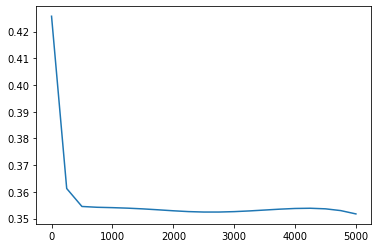

In [ ]:
plt.plot(epochs, errors)
plt.show()

In [ ]:
# network = NetworkMC(1728, 128, 64, 3)
# Однажды обучилась до 100% точности с такими параметрами
# network = NetworkMC(1728, 81, 27, 3)
# epochs, errors = network.train_grad_stochastic(x_tr, y_train, 0.1, 500)
start_time = time.time()
network = NetworkMC(1728, 16, 8, 4, 3)
epochs, errors = network.train_grad_full_batch(x_tr, y_train, 0.01, 100)
print("time of training: " + str(time.time() - start_time) + " seconds")

Epoch 0 err: 0.246
Epoch 0 acc: 0.333
Epoch 4 err: 0.249
Epoch 4 acc: 0.267
Epoch 9 err: 0.244
Epoch 9 acc: 0.133
Epoch 14 err: 0.239
Epoch 14 acc: 0.200
Epoch 19 err: 0.231
Epoch 19 acc: 0.200
Epoch 24 err: 0.223
Epoch 24 acc: 0.267
Epoch 29 err: 0.213
Epoch 29 acc: 0.333
Epoch 34 err: 0.205
Epoch 34 acc: 0.467
Epoch 39 err: 0.184
Epoch 39 acc: 0.800
Epoch 44 err: 0.182
Epoch 44 acc: 0.733
Epoch 49 err: 0.181
Epoch 49 acc: 0.733
Epoch 54 err: 0.181
Epoch 54 acc: 0.733
Epoch 59 err: 0.179
Epoch 59 acc: 0.800
Epoch 64 err: 0.177
Epoch 64 acc: 0.800
Epoch 69 err: 0.176
Epoch 69 acc: 0.733
Epoch 74 err: 0.176
Epoch 74 acc: 0.733
Epoch 79 err: 0.174
Epoch 79 acc: 0.733
Epoch 84 err: 0.173
Epoch 84 acc: 0.733
Epoch 89 err: 0.173
Epoch 89 acc: 0.733
Epoch 94 err: 0.173
Epoch 94 acc: 0.733
Epoch 99 err: 0.173
Epoch 99 acc: 0.733
time of training: 45.898473262786865 seconds


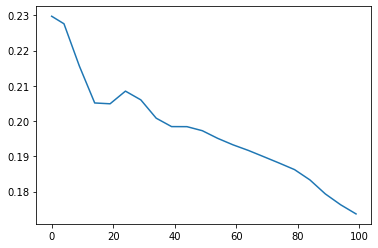

In [ ]:
plt.plot(epochs, errors)
plt.show()

In [ ]:
def get_res(y):
  if y > 0.5:
    return 1
  return 0

def get_res_multy(y):
  return np.argmax(y)

[[0.5383624621309728, 0.19009681210428392, 0.3217208240770139], [0.45002104528361647, 0.22405133850492187, 0.3285870133563257], [0.60752112796197, 0.16531421756101408, 0.31599903692618375], [0.11506522329960439, 0.43359609077826006, 0.34817366245904147], [0.10181128804406171, 0.45138896605034523, 0.3210391643765552], [0.10284888809847158, 0.46071558158923154, 0.3489894222230007], [0.2427167001317908, 0.26524617469752043, 0.35924777868497154], [0.11221788696315363, 0.430160543631123, 0.32040811785703466]]
acc:0.875


IndexError: ignored

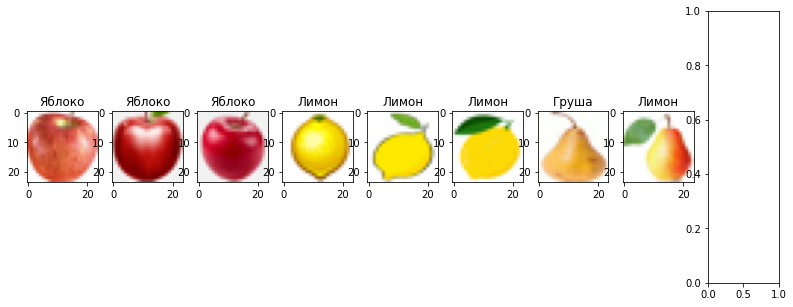

In [ ]:
y_pred = network.predict(x_tst)
y_pred_classes = []
print(y_pred)
for i in range(len(y_pred)):
  y_pred_classes.append(get_res_multy(y_pred[i]))
acc = err_acc(y_test, y_pred_classes, 0.1)
print("acc:" + str(acc))
ress = ['Яблоко', 'Лимон', 'Груша']
plt.figure(figsize=(15,5))
for i in range(9):
  plt.subplot(1, 10, i + 1)
  plt.title(ress[get_res_multy(y_pred[i])])
  plt.imshow(x_test[i])